<a href="https://colab.research.google.com/github/Devil-Rick/Fake-Job-Detection/blob/main/Fake_Job_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Year Project 
## Group - 
#### Members :
* Saptarshi Dhibar - 10200118026
* Sanchita Pandit - 10200118027
* Niladri Sarker - 10200118037
* Koustav Roy - 10200118038

# **Fake Job Detection**
The `Employment Scam Aegean Dataset `(EMSCAD) is a dataset containing 17,880 `real-life job` ads that aims at providing a clear picture of the `Employment Scam problem`.


---



---



## Dataset Description
* Name - Description
* Title	- The title of the job ad entry.
* Location	- Geographical location of the job ad.
* Department	- Corporate department (e.g. sales).
* Salary range	- Indicative salary range (e.g. $50,000-$60,000)
* Company profile -	A brief company description.
* Description	- The details description of the job ad.
* Requirements -	Enlisted requirements for the job opening.
* Benefits	- Enlisted offered benefits by the employer.
* Telecommuting -	True for telecommuting positions.
* Company logo -	True if company logo is present.
* Questions -	True if screening questions are present.
* Fraudulent -	Classification attribute.
In balanced	Selected for the balanced dataset
* Employment type -	Full-type, Part-time, Contract, etc.
* Required experience	- Executive, Entry level, Intern, etc.
* Required education -	Doctorate, Master’s Degree, Bachelor, etc.
* Industry	- Automotive, IT, Health care, Real estate, etc.
* Function -	Consulting, Engineering, Research, Sales etc.

##Using  google colab to upload the dataset present in Google drive






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the packages required for this project

In [ ]:
# import the required libraries

%matplotlib inline

# Basic Libraries
import pandas as pd 
import numpy as np

# Libraries for visualisation
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
import seaborn as sns
import plotly.express as px

# Libraries for text processing and cleaning
import re
import nltk
from nltk.corpus import stopwords , wordnet
from sklearn.feature_extraction.text import CountVectorizer 
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Libraries for Model building 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Libraries for Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# Libraries for evaluation
from sklearn.metrics import confusion_matrix , classification_report , precision_score , f1_score , recall_score
from sklearn.metrics import plot_roc_curve ,accuracy_score

# libraires for warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fake Job Dataset/fake_job_postings.csv')

# Statistical Analysis

## Reading the dataset present in the drive

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##How the dataset looks like 

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

##Attributes/Columns present in the dataset

In [ ]:
df.shape

(17880, 18)

##The dataset has 17880 rows and 18 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

##Type of data present in each column

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


##Statistical analysis of the data present in columns

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

##Finding the total number of null data present 

In [ ]:
df.fillna('N/A', inplace=True)

##Replacing Null values with N/A

# **Starting The EDA**  

,fraudulent,title
0,0,17014
1,1,866


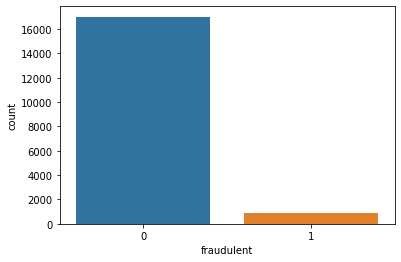

In [ ]:
sns.countplot(df['fraudulent']);
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

##A countplot showing the contrast between the value 0 and 1 present in the column 'fraudulent'. The count for 0 is way higher than 1.This shows most of the job posts are authentic


In [ ]:
df.title.value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

##Frequency of each value in the column 'title'

In [ ]:
df.title.where(df.fraudulent == 1).value_counts()

Data Entry Admin/Clerical Positions - Work From Home               21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
RN, SURGERY UNIT DIRECTOR                                           1
Registered Nurse                                                    1
Licensed Practical Nurse                                            1
Professional Development Coordinator (Perioperative)                1
Furniture mover                                                     1
Name: title, Length: 560, dtype: int64

## Frequency of each value in the column 'title' where fraudulent is 1

In [ ]:
df.location.unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

## Displaying the unique locations present in location column

In [ ]:
# Creating a new Column Country from the existing Location
def country(location):
  out = location.split(',')
  return out[0]
df['Country'] = df.location.apply(country) 
df.Country.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
CO        1
SD        1
UG        1
KH        1
Name: Country, Length: 91, dtype: int64

In [ ]:
df.Country.where(df.fraudulent == 1).value_counts()

US     730
AU      40
GB      23
N/A     19
MY      12
CA      12
QA       6
BH       5
IN       4
PL       3
TW       2
BR       1
SA       1
PH       1
AE       1
EE       1
ZA       1
ID       1
EG       1
PK       1
ES       1
Name: Country, dtype: int64

## Frequency of each country where fraudulent is 1

In [ ]:
# fraud JOB posting in each Country
fraud_job_Country = dict(df.Country.where(df.fraudulent == 1).value_counts()[:12])
fraud_job_values = list(fraud_job_Country.values())
fraud_job_keys = list(fraud_job_Country.keys())

# total JOB posting in each Country
all_job_Country = dict(df.Country.value_counts()[:12])
all_job_values = list(all_job_Country.values())
all_job_keys = list(all_job_Country.keys())


Fig=px.bar(x = all_job_keys , y = all_job_values, title="Job Postings In Different Countries",
           labels=dict(x="Countries", y="Count of Job Posts"));
Fig.show()


Fig=px.bar(x = fraud_job_keys , y = fraud_job_values, title="Most Fraud Job Postings In Different Countries",
           labels=dict(x="Countries", y="Count of Fake Posts"));
Fig.show()



Code to showcase the difference between the total number of job posted in each country verssus the total number of fake jobs posted

**The first graph shows all the jobs posted and the second graph shows the fraud jobs among them.From the graphs we can vividly see that US has the maximum number of job posts as well as maximum fake job posts.It also need to be noted that GB has few job posts but most of them are fake.**

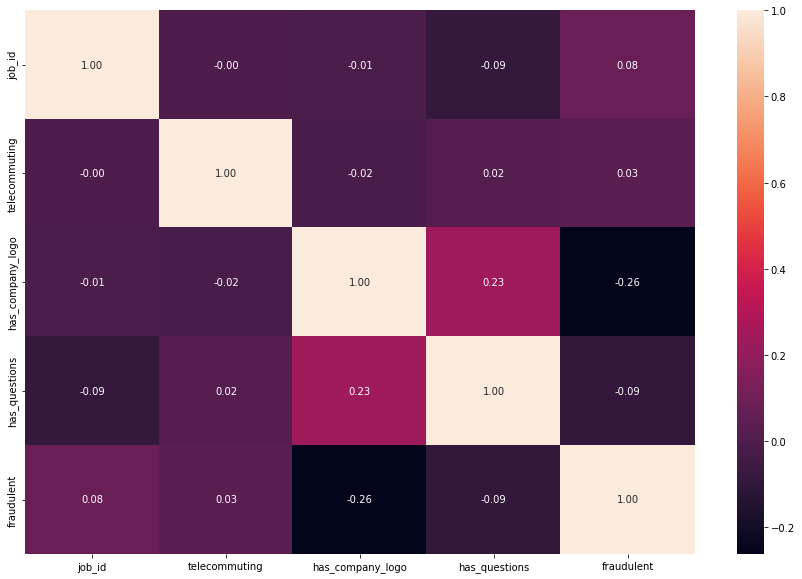

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

Heatmap showing the correlation between different columns in the dataset.

**From the heatmap it can be easily concluded that none of the columns or attributes are significantly correlated. Each feature is independently significant to the dataset but not to one another.**

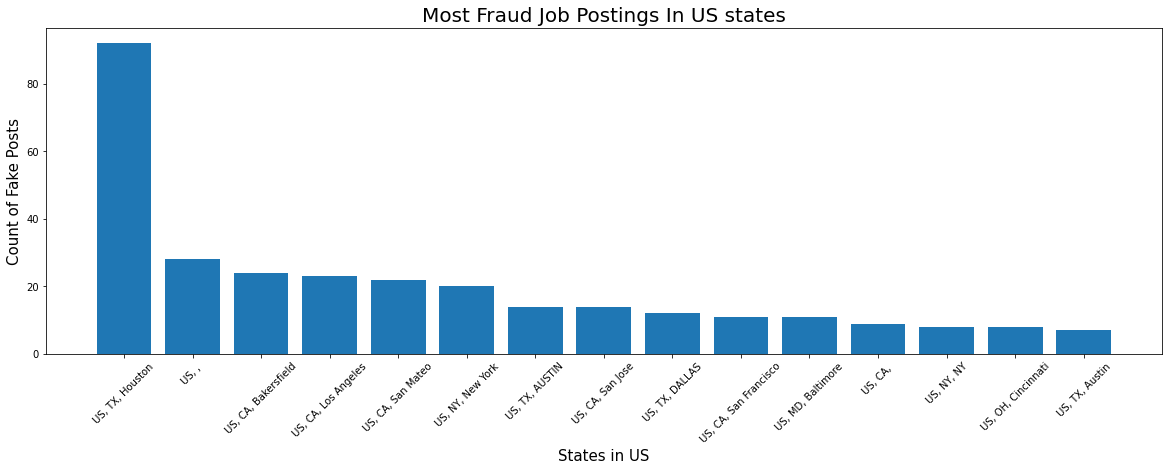

In [ ]:
most_fraud = dict(df.location.where((df.Country == 'US') & (df.fraudulent == 1)).value_counts()[:15])

# plot
plt.figure(figsize=(20,6))
plt.title('Most Fraud Job Postings In US states' , size = 20)
plt.xticks(rotation= 45)
plt.ylabel('Count of Fake Posts' , size = 15)
plt.xlabel('States in US' , size = 15)
plt.bar(most_fraud.keys() , most_fraud.values());

The graph shows the fraud job posted in the respective states of US.

**From the graph it can be concluded  that Houston has way more number of fake job posts than any other states in the US**

In [ ]:
df['function'].where(df['fraudulent'] == 1).value_counts()

N/A                       337
Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Financial Analyst           5
Advertising                 5
Consulting                  4
Data Analyst                4
Distribution                3
Design                      3
Manufacturing               2
Public Relations            1
Education                   1
Business Analyst            1
Strategy/Planning           1
General Business            1
Art/Creative                1
Health Care Provider        1
Name: function, dtype: int64

Frequency of fake jobs posts in various departments/function

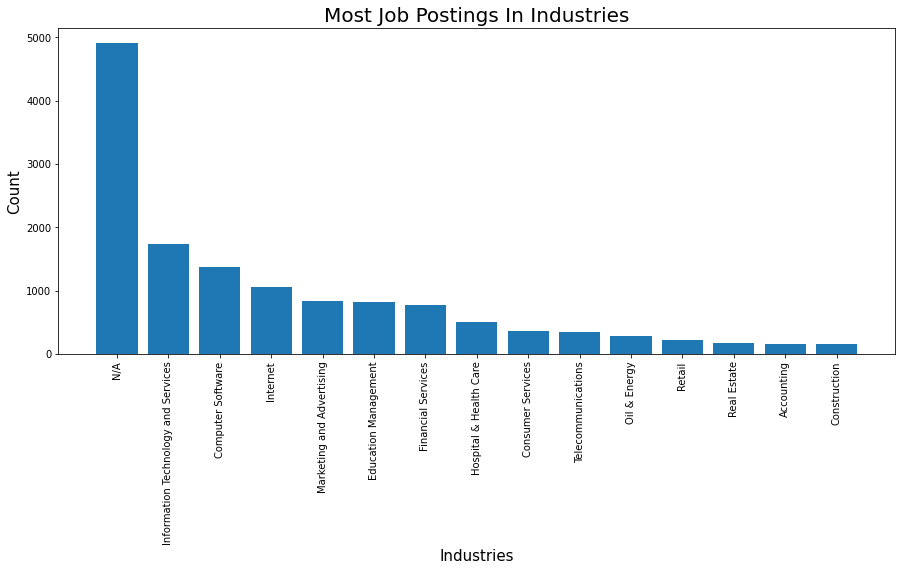

In [ ]:
most_fraud = dict(df.industry.value_counts()[:15])

# plot
plt.figure(figsize=(15,6))
plt.title('Most Job Postings In Industries' , size = 20)
plt.xticks(rotation= 90)
plt.ylabel('Count' , size = 15)
plt.xlabel('Industries' , size = 15)
plt.bar(most_fraud.keys() , most_fraud.values());

Frequency of Job posts according to industries.

**It is evident from the graph given below that most of the  job posts are **not** industry oriented. Though a large number of job posts are from IT sector but clearly majority of them does not provide a specific industry ,   i.e. N/A**

In [ ]:
df['department'].value_counts()

N/A                                            11547
Sales                                            551
Engineering                                      487
Marketing                                        401
Operations                                       270
                                               ...  
Commercial Management / Contract Management        1
Exec                                               1
Marcomm                                            1
CRM                                                1
Hospitality                                        1
Name: department, Length: 1338, dtype: int64

## Frequency of each department 

In [ ]:
df['employment_type'].value_counts()

Full-time    11620
N/A           3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

## Frequency of each employment type

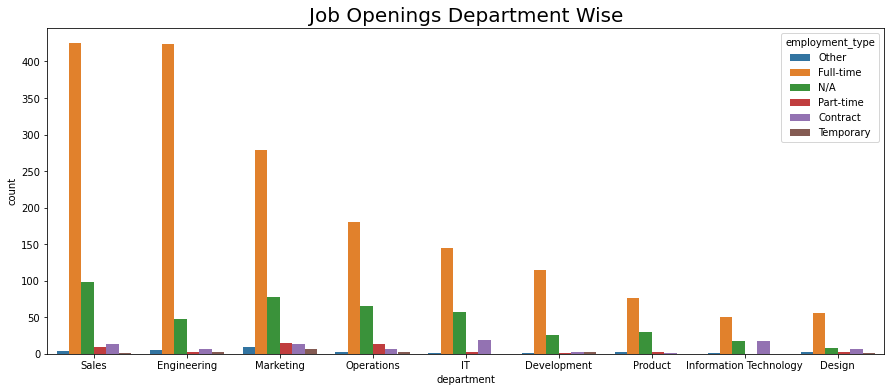

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Job Openings Department Wise' , size = 20)
sns.countplot(x = 'department', hue="employment_type", 
              data=df,order=df.department.value_counts().iloc[1:10].index);

Graph showing the job openings in each department on the basis of employment type

**The tall orange bars are more than enough to explain that most of the job openings are full time irrespective of the department.Not even  in a single department does any other employment type surpasses 'full time'.**

In [ ]:
df['employment_type'].where(df.fraudulent == 1).value_counts()

Full-time    490
N/A          241
Part-time     74
Contract      44
Other         15
Temporary      2
Name: employment_type, dtype: int64

## Frequency of each employment type where fraudulent is 1

In [ ]:
def ratio_Calc(parameter):
  real_jobs = dict(df[parameter].where(df.fraudulent == 0).value_counts())
  fake_jobs = dict(df[parameter].where(df.fraudulent == 1).value_counts())
  fake_percentage = {key+"_ratio":fake_jobs[key]/real_jobs[key] for key in real_jobs.keys()}
  fake_df = pd.DataFrame(fake_percentage, index=['Ratio'])
  return fake_percentage , fake_df

## code to calculate the ratio of fake jobs 

In [ ]:
fake_percentage , fake_df= ratio_Calc('employment_type')
fake_df

,Full-time_ratio,N/A_ratio,Contract_ratio,Part-time_ratio,Temporary_ratio,Other_ratio
Ratio,0.044025,0.074613,0.02973,0.102351,0.008368,0.070755


## code to calculate the fake job ratio in each employment type

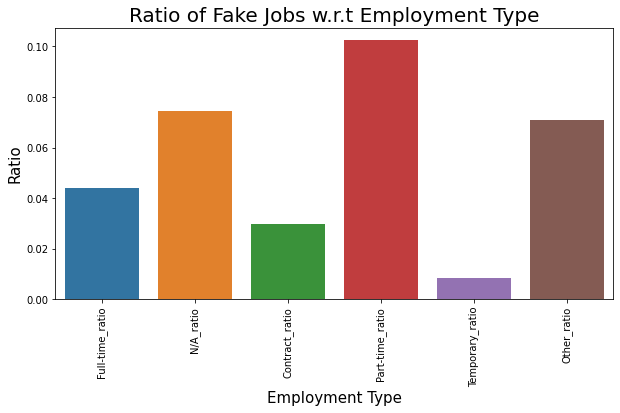

In [ ]:
#plot
plt.figure(figsize=(10,5))
plt.title('Ratio of Fake Jobs w.r.t Employment Type' , size = 20)
plt.xticks(rotation= 90)
plt.ylabel('Ratio' , size = 15)
plt.xlabel('Employment Type' , size = 15)
sns.barplot(list(fake_percentage.keys()) , list(fake_percentage.values()));

Graph  showing the fake job ratio in each employment type.

**The maximum number of fake jobs are for part time jobs.The temporary job is the least and for full time jobs the ratio of fake jobs is also considerable.As expected the job posts where the employment type is not mentioned i.e. N/A  the fake job ratio should be high and indeed it is.**

In [ ]:
df['required_experience'].value_counts()

N/A                 7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

## Frequency of each required experience type

In [ ]:
fake_percentage , fake_df= ratio_Calc('required_experience')
fake_df

,N/A_ratio,Mid-Senior level_ratio,Entry level_ratio,Associate_ratio,Not Applicable_ratio,Director_ratio,Internship_ratio,Executive_ratio
Ratio,0.06576,0.030574,0.071088,0.018625,0.056818,0.045699,0.026954,0.076336


## Calculating the fake job ratio according to the required experience type

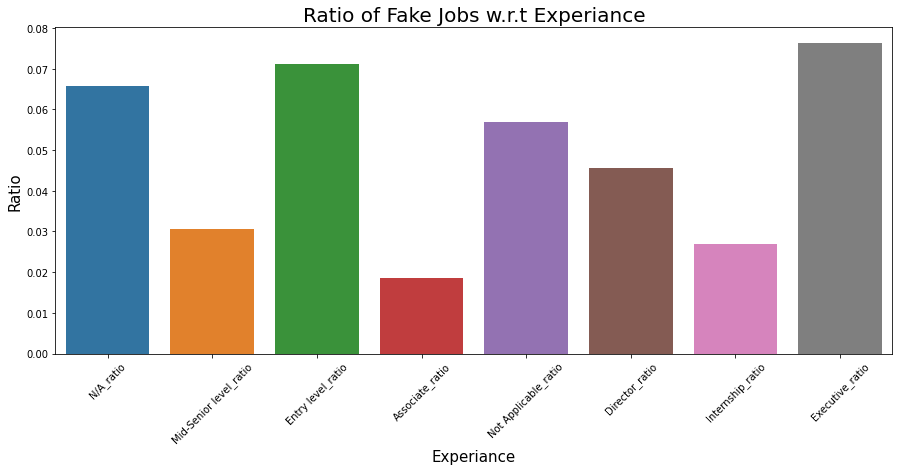

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Ratio of Fake Jobs w.r.t Experiance' , size = 20)
plt.xticks(rotation= 45)
plt.ylabel('Ratio' , size = 15)
plt.xlabel('Experiance' , size = 15)
sns.barplot(list(fake_percentage.keys()) , list(fake_percentage.values()));

Graph showing the fake job ratio according to the required experience type

**We see the fake job ratio is  very high for Executive and Entry level. The not mentioned i.e. N/A and Not applicable job posts are high too.Thus, it can be concluded that job posts with entry level and Executive level experience have higher chances of being fake. The intermediate job posts have a good chances to be authentic.**

In [ ]:
edu=dict(df.required_education.value_counts()[:7])
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'N/A': 8105,
 'Unspecified': 1397}

Text(0, 0.5, 'No. of Jobs')

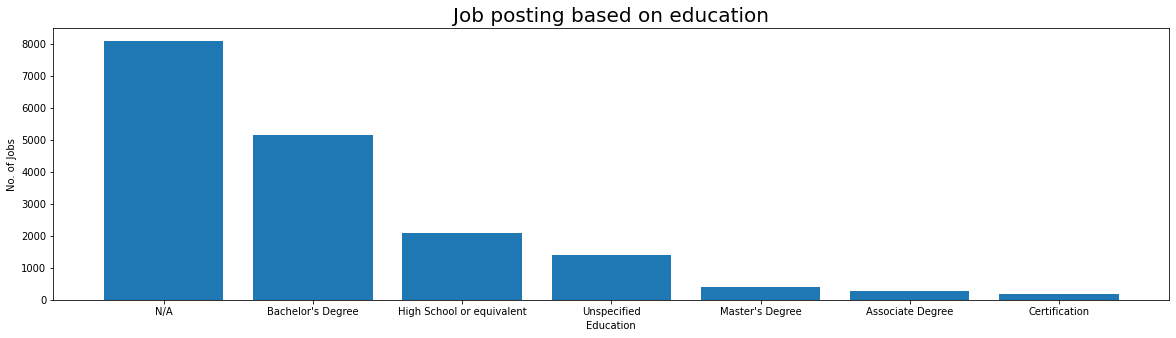

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Job posting based on education", size=20)
plt.bar(edu.keys(),edu.values())
plt.xlabel("Education", size=10)
plt.ylabel("No. of Jobs", size=10)

# Cleaning and Pre-Processing The Data

In [ ]:
# dropping the useless cols 
df.drop(['job_id', 'location','salary_range','Country'] , axis = 1 , inplace = True)

In [ ]:
df['text'] = df[['title', 'department','company_profile','description'
,'requirements','benefits']].apply(lambda x: ' '.join(x), axis = 1)

In [ ]:
#now we can remove the col merged in text
df.drop(['title', 'department','company_profile','description'
,'requirements','benefits'] , axis = 1 , inplace = True)

In [ ]:
df.head(3)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,0,1,0,Other,Internship,N/A,N/A,Marketing,0,"Marketing Intern Marketing We're Food52, and w..."
1,0,1,0,Full-time,Not Applicable,N/A,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production Succ...
2,0,1,0,N/A,N/A,N/A,N/A,N/A,0,Commissioning Machinery Assistant (CMA) N/A Va...


In [ ]:
X = df.drop('fraudulent' , axis = 1)
y = df['fraudulent']

# splitting the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((12516, 9), (5364, 9), (12516,), (5364,))

In [ ]:
x_train_obj = X_train['text'].apply(lambda row: TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_obj.values]

x_test_obj = X_test['text'].apply(lambda row: TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_obj.values]

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

In [ ]:
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [ ]:
X_train['Clean Text'] = stp(X_train['text'].values)
X_test['Clean Text'] = stp(X_test['text'].values)

X_train.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,text,Polarity,Subjectivity,Clean Text
2412,0,1,0,Temporary,Entry level,High School or equivalent,Marketing and Advertising,Other,Mystery Shopper N/A SDI Marketing started in 1...,0.277190,0.581180,mysteri shopper n sdi market start small marke...
10960,0,1,1,Other,Not Applicable,N/A,Internet,Other,Intern N/A We’ve built revolutionary technolog...,0.235992,0.543552,intern n built revolutionari technolog chang w...
14273,0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Human Resources,Talent Acquisition Specialist USA People Opera...,0.205661,0.555217,talent acquisit specialist usa peopl oper foun...
4122,0,1,0,N/A,N/A,N/A,N/A,N/A,Chief Operating Officer N/A MarketInvoice is o...,0.221546,0.465577,chief oper offic n marketinvoic one high profi...
9578,0,1,0,Full-time,N/A,N/A,Financial Services,N/A,Client Manager N/A Founded by Daniel Tenner an...,0.257559,0.491892,client manag n found daniel tenner paulina syg...


In [ ]:
X_train_numeric = X_train.drop(['text' , 'Clean Text'], axis=1).reset_index(drop=True)
X_test_numeric = X_test.drop(['text' , 'Clean Text'], axis=1).reset_index(drop=True)

X_train_numeric.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Polarity,Subjectivity
0,0,1,0,Temporary,Entry level,High School or equivalent,Marketing and Advertising,Other,0.277190,0.581180
1,0,1,1,Other,Not Applicable,N/A,Internet,Other,0.235992,0.543552
2,0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Human Resources,0.205661,0.555217
3,0,1,0,N/A,N/A,N/A,N/A,N/A,0.221546,0.465577
4,0,1,0,Full-time,N/A,N/A,Financial Services,N/A,0.257559,0.491892


In [ ]:
cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1) , max_features=6000)
X_traincv = cv.fit_transform(X_train['Clean Text']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Text']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,aaa,aab,aabbf,aac,aad,aae,aan,ab,abap,abb,abc,abe,aberdeen,abfceafd,abil,abilitiesexperi,abl,aboard,abov,abreast,abroad,absenc,absolut,abstract,abus,abzorba,ac,academ,academi,academia,acb,acc,accel,acceler,accept,access,accessori,accid,accion,...,xslt,ya,yacht,yael,yahoo,yammer,yard,ye,year,yearli,yearsexperi,yeast,yellow,yet,yield,yii,yoga,york,yorkshir,young,youth,youtub,youyou,yoyo,yr,zaiu,zappo,zealand,zelf,zend,zendesk,zero,zijn,zingchart,zodat,zone,zoottl,zopa,zu,zylun
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']
lb = LabelEncoder()

for i in label_columns:
  X_train_numeric[i] = lb.fit_transform(X_train_numeric[i])
  X_test_numeric[i] = lb.fit_transform(X_test_numeric[i])

X_train_numeric.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Polarity,Subjectivity
0,0,1,0,5,2,4,75,24,0.277190,0.581180
1,0,1,1,3,7,6,61,24,0.235992,0.543552
2,0,1,1,1,0,1,61,17,0.205661,0.555217
3,0,1,0,2,6,6,85,23,0.221546,0.465577
4,0,1,0,1,6,6,39,23,0.257559,0.491892


In [ ]:
X_train_final = pd.concat([X_train_numeric, X_traincv], axis=1)
X_test_final = pd.concat([X_test_numeric, X_traincv], axis=1)
X_train_final.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Polarity,Subjectivity,aa,aaa,aab,aabbf,aac,aad,aae,aan,ab,abap,abb,abc,abe,aberdeen,abfceafd,abil,abilitiesexperi,abl,aboard,abov,abreast,abroad,absenc,absolut,abstract,abus,abzorba,ac,academ,academi,...,xslt,ya,yacht,yael,yahoo,yammer,yard,ye,year,yearli,yearsexperi,yeast,yellow,yet,yield,yii,yoga,york,yorkshir,young,youth,youtub,youyou,yoyo,yr,zaiu,zappo,zealand,zelf,zend,zendesk,zero,zijn,zingchart,zodat,zone,zoottl,zopa,zu,zylun
0,0,1,0,5,2,4,75,24,0.277190,0.581180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,3,7,6,61,24,0.235992,0.543552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,1,61,17,0.205661,0.555217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,6,6,85,23,0.221546,0.465577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,6,6,39,23,0.257559,0.491892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_final.dropna(inplace=True)
X_test_final.dropna(inplace=True)

# Model Building and Base-Line Metric Test

In [ ]:
# use X_train_final as X_train data and X_test_final as X_test
# also y_train and y_test are present

In [ ]:
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train_final,y_train)
y_pred_rf = model_rf.predict(X_test_final)
rf_accuracy = model_rf.score(X_test_final, y_test)
print("Random Forest accuracy", rf_accuracy)

Random Forest accuracy 0.9177852348993288


In [56]:
models = {'Logistic Regression' : LogisticRegression() ,
         'Random Forests' : RandomForestClassifier() ,
         'Desicion Tree' : DecisionTreeClassifier() ,
          'GaussianNB' : GaussianNB(),
          'SVC' : SVC()}

# Fitting and checkin score of models
def prep_models(models , X_train , X_test , y_train  , y_test):
    """
        fitting and testing different models 
        models = dict of the required models
    """
    
    # set the random seed
    np.random.seed(45)
    
    #scores dict 
    mod_scores = {}
    
    for name , model in models.items():
        model.fit(X_train , y_train) # fitting the model
        pred = model.predict(X_test)
        # evaluating and adding the scores to the dict
        mod_scores[name] = {'Precision' : precision_score(pred , y_test ) , 
                           'Recall' : recall_score(pred , y_test ) , 
                           'F1 Score' : f1_score(pred , y_test )  , 
                           'Accuracy' : accuracy_score(pred , y_test )}
    return mod_scores

In [57]:
model_scores = prep_models(models , X_train_final , X_test_final , y_train  , y_test)
model_display = pd.DataFrame(model_scores)
model_display

,Logistic Regression,Random Forests,Desicion Tree,GaussianNB,SVC
Precision,0.059041,0.044280,0.177122,0.077491,0.007380
Recall,0.075829,0.063830,0.156863,0.053165,0.071429
F1 Score,0.066390,0.052288,0.166378,0.063063,0.013378
Accuracy,0.916107,0.918904,0.910328,0.883669,0.945004
